# Project 3 - Applying Your Skills
## Name - Mahvash Maghrabi

## Task 1 - Pre-processing, Data Mining, and Visualization

In [1]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Loading the dataset in pandas dataframe
data = pd.read_csv('/Users/mahvashmaghrabi/Downloads/heart.csv')

In [3]:
# Printing the head of the dataset
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Pre-Processing/Cleaning

In [4]:
# Converting the categorical values into numerical values using Label Encoding
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['ChestPainType'] = encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = encoder.fit_transform(data['ST_Slope'])

In [5]:
# Checking the head of the dataset after label encoding
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [6]:
# Checking and printing the null values and it's count
nullValues = data.isnull()
print(nullValues.sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
# Data description
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [8]:
# Checking if the data consists any duplicate values
duplicates = data.duplicated()
print(data[duplicates])

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


# Data Visualization

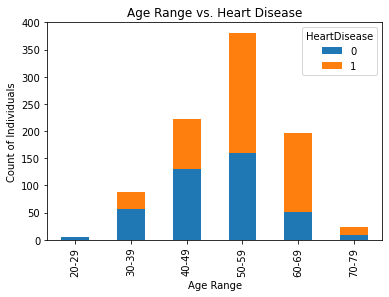

In [159]:
# Plotting a stacked bar plot that shows count of people in a particular age range having a heart disease or not
ageTens = [20, 30, 40, 50, 60, 70, 80]
ageRange = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['AgeRange'] = pd.cut(data['Age'], bins=ageTens, labels=ageRange)

# Grouping the data by age range
age = data.groupby(['AgeRange', 'HeartDisease']).size().unstack()

# Creating the stacked bar plot
age.plot(kind='bar', stacked=True)
plt.title('Age Range vs. Heart Disease')
plt.xlabel('Age Range')
plt.ylabel('Count of Individuals')
plt.show()


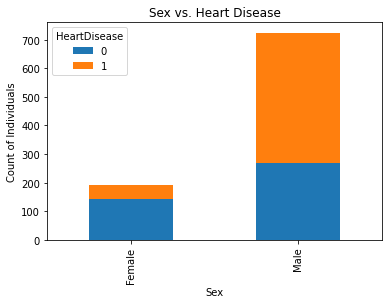

In [160]:
# Plotting a stacked bar plot that shows count of people of a particular gender having a heart disease or not
data['Sex'] = data['Sex'].replace({1: 'Male', 0: 'Female'})

# Grouping the data by gender
gender = data.groupby(['Sex', 'HeartDisease']).size().unstack()

# Creating a stacked bar plot
gender.plot(kind='bar', stacked=True)
plt.title('Sex vs. Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count of Individuals')
plt.show()


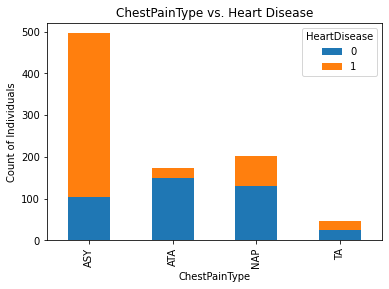

In [161]:
# Plotting a stacked bar plot that shows count of people with a particular chest pain having a heart disease or not
data['ChestPainType'] = data['ChestPainType'].replace({0: 'ASY',1: 'ATA', 2: 'NAP',3: 'TA'})

# Grouping the data by chest pain type
cpType = data.groupby(['ChestPainType', 'HeartDisease']).size().unstack()

# Creating a stacked bar plot
cpType.plot(kind='bar', stacked=True)
plt.title('ChestPainType vs. Heart Disease')
plt.xlabel('ChestPainType')
plt.ylabel('Count of Individuals')
plt.show()


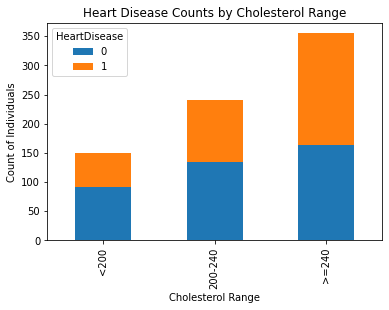

In [162]:
# Plotting a stacked bar plot that shows count of people within a particular cholestrol having a heart disease or not
cholesterolPoints = [0, 200, 240, float('inf')]
cholesterolRange = ['<200', '200-240', '>=240']
data['CholesterolRange'] = pd.cut(data['Cholesterol'], bins=cholesterolPoints, labels=cholesterolRange)
grouped = data.groupby('CholesterolRange')

# Grouping the data by Cholestrol range
c = grouped['HeartDisease'].value_counts().unstack()

# Creating a stacked bar plot
c.plot(kind='bar', stacked=True)
plt.title('Heart Disease Counts by Cholesterol Range')
plt.xlabel('Cholesterol Range')
plt.ylabel('Count of Individuals')
plt.show()


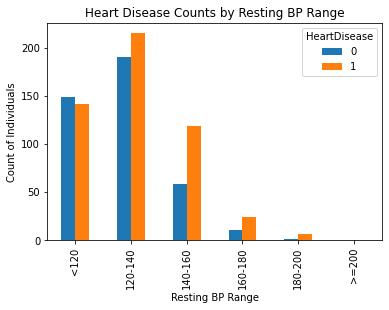

In [163]:
# Plotting a grouped bar chart that shows count of people within a particular RestingBP range having a heart disease or not
bp_bins = [80, 120, 140, 160, 180, 200, float('inf')]
bp_labels = ['<120', '120-140', '140-160', '160-180', '180-200', '>=200']
data['BPRange'] = pd.cut(data['RestingBP'], bins=bp_bins, labels=bp_labels)

# Grouping the data by RestingBP Range
grouped = data.groupby(['BPRange', 'HeartDisease']).size().unstack()

# Creating a grouped bar plot
grouped.plot(kind='bar')
plt.title('Heart Disease Counts by Resting BP Range')
plt.xlabel('Resting BP Range')
plt.ylabel('Count of Individuals')
plt.show()


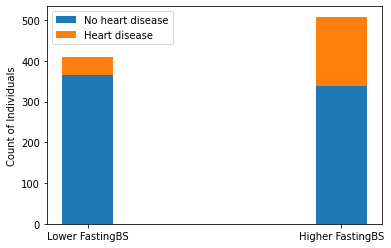

In [164]:
# Plotting a stacked bar plot that shows count of people with a higher FastingBS or a lower FastingBS having a heart disease or not
counts = data.groupby(['FastingBS', 'HeartDisease']).size().unstack()

# Creating stacked bar chart
figure, ax = plt.subplots()
ax.bar([0, 1], counts.iloc[0], label='No heart disease', width=0.2)
ax.bar([0, 1], counts.iloc[1], label='Heart disease', bottom=counts.iloc[0], width=0.2)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Lower FastingBS', 'Higher FastingBS'])
ax.set_ylabel('Count of Individuals')
ax.legend()
plt.show()


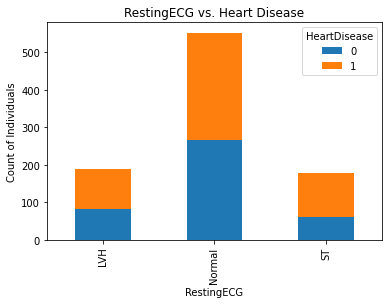

In [165]:
# Plotting a stacked bar plot that shows count of people with a different RestingECG having a heart disease or not
data['RestingECG'] = data['RestingECG'].replace({0: 'LVH', 1: 'Normal', 2: 'ST'})

# Grouping the data by RestingECG
restecg = data.groupby(['RestingECG', 'HeartDisease']).size().unstack()

# Create a stacked bar plot
restecg.plot(kind='bar', stacked=True)
plt.title('RestingECG vs. Heart Disease')
plt.xlabel('RestingECG')
plt.ylabel('Count of Individuals')
plt.show()

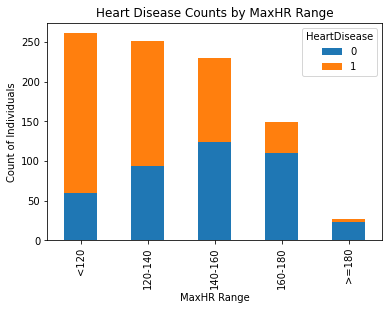

In [166]:
# Plotting a stacked bar plot that shows count of people within a particular MaxHR range having a heart disease or not
maxhr_bins = [0, 120, 140, 160, 180, float('inf')]
maxhr_labels = ['<120', '120-140', '140-160', '160-180', '>=180']
data['MaxHRRange'] = pd.cut(data['MaxHR'], bins=maxhr_bins, labels=maxhr_labels)
grouped = data.groupby('MaxHRRange')

# Grouping the data by MaxHR
maxhr = grouped['HeartDisease'].value_counts().unstack()

# Creating a stacked bar chart
maxhr.plot(kind='bar', stacked=True)
plt.title('Heart Disease Counts by MaxHR Range')
plt.xlabel('MaxHR Range')
plt.ylabel('Count of Individuals')
plt.show()


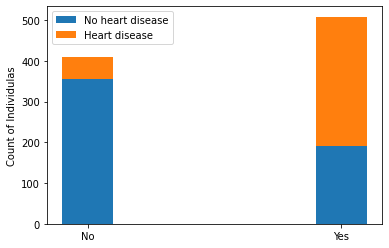

In [167]:
# Map ExcerciseAngina values to corresponding labels
labels = {0: 'No', 1: 'Yes'}
data['ExerciseAngina'] = data['ExerciseAngina'].map(labels)

# Group data by ExcerciseAngina and HeartDisease and count the number of patients in each group
counts = data.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack()

# Create stacked bar chart
figure, ax = plt.subplots()
ax.bar([0, 1], counts.iloc[0], label='No heart disease', width=0.2)
ax.bar([0, 1], counts.iloc[1], bottom=counts.iloc[0], label='Heart disease', width=0.2)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('Count of Individulas')
ax.legend()
plt.show()


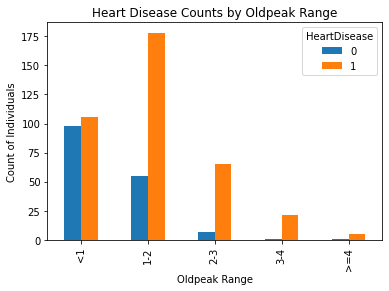

In [168]:
# Plotting a grouped bar chart that shows count of people within the oldpeak range having a heart disease or not
oldpeak_bins = [0, 1, 2, 3, 4, float('inf')]
oldpeak_labels = ['<1', '1-2', '2-3', '3-4', '>=4']
data['OldpeakRange'] = pd.cut(data['Oldpeak'], bins=oldpeak_bins, labels=oldpeak_labels)

# Grouping the data by Oldpeak range
op = data.groupby(['OldpeakRange', 'HeartDisease']).size().unstack()

# Creating a grouped bar chart
op.plot(kind='bar')
plt.title('Heart Disease Counts by Oldpeak Range')
plt.xlabel('Oldpeak Range')
plt.ylabel('Count of Individuals')
plt.show()


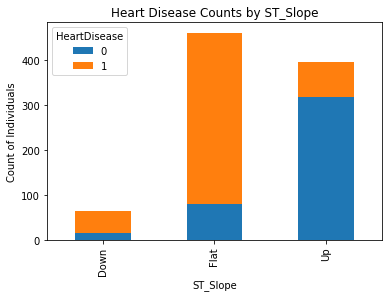

In [169]:
# Plotting a stacked bar chart that shows count of people with a particular ST Slope having a heart disease or not
data['ST_Slope'] = data['ST_Slope'].replace({0: 'Down', 1: 'Flat', 2: 'Up'})
grouped = data.groupby(['ST_Slope', 'HeartDisease'])

# Grouing the data by ST Slope
st = grouped.size().unstack()

# Creating a stacked bar chart
st.plot(kind='bar', stacked=True)
plt.title('Heart Disease Counts by ST_Slope')
plt.xlabel('ST_Slope')
plt.ylabel('Count of Individuals')
plt.show()


## Cleaning the Train and Test Data

In [11]:
# Loading the train data into pandas dataframe
traindata = pd.read_csv('/Users/mahvashmaghrabi/Downloads/heart_train_718.csv')

In [12]:
# Loading the test data into pandas dataframe
testdata = pd.read_csv('/Users/mahvashmaghrabi/Downloads/heart_test_200.csv')

In [13]:
# Converting the categorical values of the train dataset into numerical values using Label Encoding
encoder = LabelEncoder()
traindata['Sex'] = encoder.fit_transform(traindata['Sex'])
traindata['ChestPainType'] = encoder.fit_transform(traindata['ChestPainType'])
traindata['RestingECG'] = encoder.fit_transform(traindata['RestingECG'])
traindata['ExerciseAngina'] = encoder.fit_transform(traindata['ExerciseAngina'])
traindata['ST_Slope'] = encoder.fit_transform(traindata['ST_Slope'])

In [14]:
# Converting the categorical values of the test dataset into numerical values using Label Encoding
encoder = LabelEncoder()
testdata['Sex'] = encoder.fit_transform(testdata['Sex'])
testdata['ChestPainType'] = encoder.fit_transform(testdata['ChestPainType'])
testdata['RestingECG'] = encoder.fit_transform(testdata['RestingECG'])
testdata['ExerciseAngina'] = encoder.fit_transform(testdata['ExerciseAngina'])
testdata['ST_Slope'] = encoder.fit_transform(testdata['ST_Slope'])

In [15]:
traindata.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,66,0,2,146,278,0,0,152,0,0.0,1,0
1,65,1,0,150,235,0,1,120,1,1.5,1,1
2,63,1,0,150,223,0,1,115,0,0.0,1,1
3,58,1,1,136,164,0,2,99,1,2.0,1,1
4,54,1,1,192,283,0,0,195,0,0.0,2,1


In [16]:
testdata.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,61,1,0,130,0,1,1,77,0,2.5,1,1
1,40,1,0,152,223,0,1,181,0,0.0,2,1
2,45,1,0,130,219,0,2,130,1,1.0,1,1
3,62,1,0,158,170,0,2,138,1,0.0,1,1
4,60,1,0,130,206,0,0,132,1,2.4,1,1


In [17]:
# Checking and printing the null values and it's count
nullValues = traindata.isnull()
print(nullValues.sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [18]:
# Checking and printing the null values and it's count
nullValues = testdata.isnull()
print(nullValues.sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [178]:
# Checking if the data consists any duplicate values
duplicates = traindata.duplicated()
print(traindata[duplicates])


Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [179]:
# Checking if the data consists any duplicate values
duplicates = testdata.duplicated()
print(testdata[duplicates])

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


## Linear Regression

In [180]:
# Linear Regression model
dependentVariable = 'HeartDisease'
independentVariables = ['Age', 'Sex', 'ChestPainType', 'RestingBP','Cholesterol', 'FastingBS',         
'RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

# Looping over independent variables
for var in independent_variables:
# Fitting model
    model = LinearRegression()
    X = traindata[[var]]
    y = traindata[dependent_variable]
    model.fit(X, y)
    print(f'{var} - Intercept: {model.intercept_:.3f}, Coefficient: {model.coef_[0]:.3f}')

X = traindata[independentVariables]
y = traindata[dependentVariable]
model.fit(X, y)
print('R-squared:', model.score(X, y))


Age - Intercept: -0.234, Coefficient: 0.015
Sex - Intercept: 0.238, Coefficient: 0.404
ChestPainType - Intercept: 0.708, Coefficient: -0.188
RestingBP - Intercept: 0.293, Coefficient: 0.002
Cholesterol - Intercept: 0.779, Coefficient: -0.001
FastingBS - Intercept: 0.484, Coefficient: 0.316
RestingECG - Intercept: 0.509, Coefficient: 0.053
MaxHR - Intercept: 1.592, Coefficient: -0.008
ExerciseAngina - Intercept: 0.364, Coefficient: 0.491
Oldpeak - Intercept: 0.401, Coefficient: 0.181
ST_Slope - Intercept: 1.187, Coefficient: -0.464
R-squared: 0.509471803156791


## Lasso Regression

In [181]:
# Lasso Regression
dependentVariable = 'HeartDisease'
independentVariables = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                         'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

X = traindata[independentVariables]
y = traindata[dependentVariable]

#Fitting the model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Getting the significant signals
signVars = [var for var, coefficient in zip(independent_variables, lasso.coef_) if coef != 0]
print('Significant variables:', signVars)
print('No. of significant signals:', len(signVars))
print('R-squared:', lasso.score(X, y))


Significant variables: ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope']
No. of significant signals: 7
R-squared: 0.2903737471079858


## Correlation Matrix

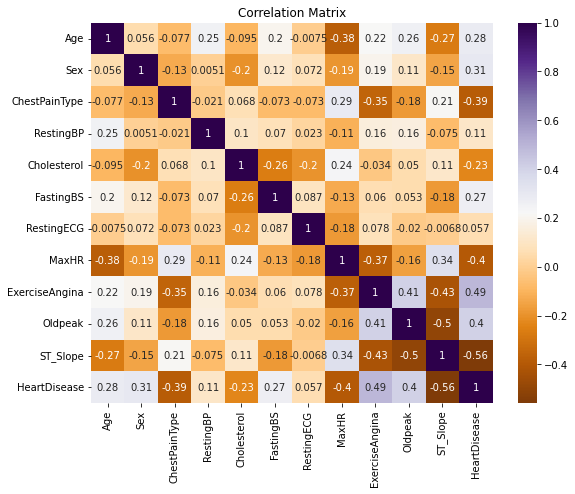

In [9]:
# Correlation matrix to check which variables are strongly or weakly correlated
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr')
plt.title('Correlation Matrix')
plt.show()


## Principal Componenet Analysis

In [134]:
# Selecting the independent variables
X = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display PCs and dependent variable
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['HeartDisease'] = data['HeartDisease']
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Loadings
load = pca.components_.T * np.sqrt(pca.explained_variance_)

# Display the loadings
loadings = pd.DataFrame(load, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)



Explained variance ratio: [0.25139665 0.1330889 ]
                     PC1       PC2
Age             0.550796 -0.097884
Sex             0.357974  0.324108
ChestPainType  -0.482329 -0.022524
RestingBP       0.276850 -0.327280
Cholesterol    -0.272560 -0.724928
FastingBS       0.328908  0.408744
RestingECG      0.177159  0.485206
MaxHR          -0.673393 -0.207029
ExerciseAngina  0.704270 -0.207496
Oldpeak         0.602190 -0.444820
ST_Slope       -0.708256  0.177564


## K-means Clustering

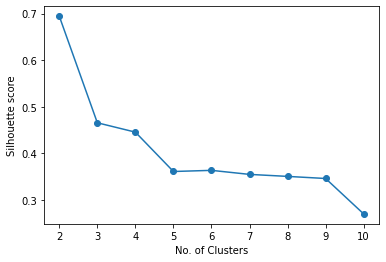

In [84]:
# Getting the sillhouette scores for different values of k 
silhouetteScores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data)
    silhouetteScores.append(silhouette_score(data, labels))

# Plotting the silhouette score for each value of K
plt.plot(range(2, 11), silhouetteScores, marker='o')
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette score")
plt.show()

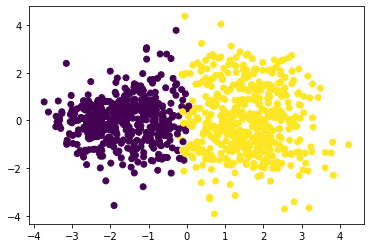

In [85]:
# Performing K-means clustering with k=2
# Standardize
scaler = StandardScaler()
dataset = scaler.fit_transform(data)

# Perform k-means clustering with value of K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset)
labels = kmeans.labels_

# Using sklearn's built in PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset)

# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

## Task 4 - Iteration

## Decision Tree Classifier

In [20]:
# Decision Tree Classifier
# Traindata
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']

# Testdata
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Fitting the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predicting
y_pred = dtree.predict(X_test)

# Printing the results
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

Accuracy: 81.50%
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        95
           1       0.82      0.83      0.82       105

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



## Iteration 1

In [21]:
# Train data
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']

# Test data
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Modification to hyperparameters
dtree = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10)

# Fitting the model
dtree.fit(X_train, y_train)

#Predicting
y_pred = dtree.predict(X_test)

# Printing results
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', confusionmatrix)


Accuracy: 82.50%
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.86      0.80      0.83       105

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200

Confusion matrix:
 [[81 14]
 [21 84]]


## Iteration 2

In [22]:
# Train data
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']

# Test data
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Modification to hyperparameters
dtree = DecisionTreeClassifier(max_depth=7, criterion='gini', min_samples_split=5)

# Fitting the model
dtree.fit(X_train, y_train)

# Predicting
y_pred = dtree.predict(X_test)

# Printing the results
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', confusionmatrix)


Accuracy: 84.00%
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        95
           1       0.84      0.86      0.85       105

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

Confusion matrix:
 [[78 17]
 [15 90]]


## Iteration 3

In [23]:
# Train data
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']

# Test data
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Modification to hyperparameters
dtree = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10, min_samples_leaf=5)

# Fitting the model
dtree.fit(X_train, y_train)

# Predicting
y_pred = dtree.predict(X_test)

# Printing results
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', confusionmatrix)


Accuracy: 80.50%
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        95
           1       0.84      0.78      0.81       105

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

Confusion matrix:
 [[79 16]
 [23 82]]


## Iteration 4

In [24]:
# Train data
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']

# Test data
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Modification to hyperparameters
dtree = DecisionTreeClassifier(max_depth=10, criterion='gini')

# Fitting the model
dtree.fit(X_train, y_train)

# Predicting
y_pred = dtree.predict(X_test)

# Printing results
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', confusionmatrix)


Accuracy: 83.00%
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        95
           1       0.83      0.86      0.84       105

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Confusion matrix:
 [[76 19]
 [15 90]]


## Grid Search CV

In [25]:
# Splitting into training and test sets
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Hyperparameter dictionary
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1')

# Fitting the GridSearchCV
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Using the best hyperparameters
dtree = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)

# Fitting the model
dtree.fit(X_train, y_train)

# Predictions
y_pred = dtree.predict(X_test)

# Printing the results
report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)



Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84        95
           1       0.86      0.85      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

Confusion matrix:
 [[81 14]
 [16 89]]


## ML Classification Methods - Extensions

## Random Forest Classifier

In [88]:
# Splitting training data 
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']

# Split the testing data
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Random Forest classifier 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Printing the results
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)


Accuracy: 85.00%
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        95
           1       0.85      0.87      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



## Naive Bayes classification

In [26]:
# Splitting the training data
X_train = traindata.drop('HeartDisease', axis=1)
y_train = traindata['HeartDisease']

# Splitting the test data
X_test = testdata.drop('HeartDisease', axis=1)
y_test = testdata['HeartDisease']

# Gaussian Naive Bayes classifier
nbayes = GaussianNB()

# Fitting the model
nbayes.fit(X_train, y_train)

# Predictions
y_pred = nbayes.predict(X_test)

# Printing the results
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

report = classification_report(y_test, y_pred)
print('Classification report:\n', report)


Accuracy: 85.50%
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        95
           1       0.87      0.85      0.86       105

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

